<a href="https://colab.research.google.com/github/AanchalDogra/lstm_time_series/blob/master/lstm_time_series_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os

import warnings
warnings.filterwarnings("ignore")

In [38]:
data_df = pd.read_csv('prices-split-adjusted.csv', index_col = 0)
data_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [39]:
data_df.symbol.nunique()

501

In [40]:
data_df.shape

(851264, 6)

In [41]:
df2 = pd.read_csv('fundamentals.csv')
df2.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


Doing only for apple stocks

In [42]:
data_df = data_df[data_df.symbol == 'AAPL']
data_df.drop(['symbol'],1, inplace = True)
data_df.shape

(1762, 5)

In [43]:
data_df

,open,close,low,high,volume
date,,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0
...,...,...,...,...,...
2016-12-23,115.589996,116.519997,115.589996,116.519997,14249500.0
2016-12-27,116.519997,117.260002,116.489998,117.800003,18296900.0
2016-12-28,117.519997,116.760002,116.199997,118.019997,20905900.0


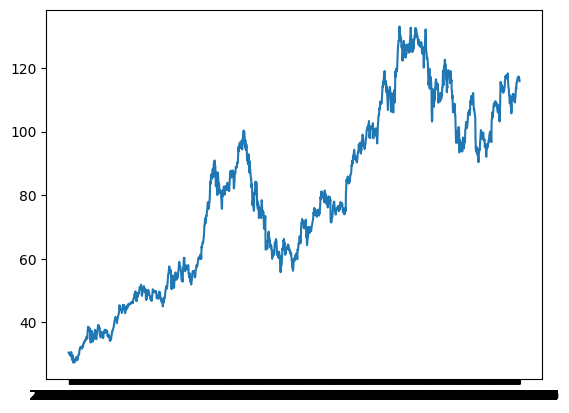

In [44]:
plt.plot(data_df['close'])
plt.show()

In [45]:
data_df.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0


In [46]:
data_df.columns

Index(['open', 'close', 'low', 'high', 'volume'], dtype='object')

In [47]:
data_df['date'] = data_df.index
data_df['date'] = pd.to_datetime(data_df['date'])


LSTMs are sensitive to the scale of the imput data , specifically when the sigmoid or tanh activation functions are used. It can be a good practice to rescale the range to 0 to 1, also called normalizing

In [48]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
# test1 = min_max_scaler.fit_transform(data_df['close'])
dataset = min_max_scaler.fit_transform(data_df['close'].values.reshape(-1,1))

In [49]:
data_df['close'].values.reshape(-1,1)

array([[ 30.57285686],
       [ 30.62571329],
       [ 30.13857071],
       ...,
       [116.760002  ],
       [116.730003  ],
       [115.82      ]])

In [50]:
data_df['close'].values

array([ 30.57285686,  30.62571329,  30.13857071, ..., 116.760002  ,
       116.730003  , 115.82      ])

In [54]:
train_size = int(len(dataset)*0.7)
test_zie = len(dataset) - train_size


train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [55]:
train

array([[0.02971784],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84189727],
       [0.84341296],
       [0.86387439]])

In [62]:
def create_dataset(dataset, look_back = 15):
  dataX, dataY = [], []
  for i in range(len(dataset)- look_back - 1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i+look_back, 0])
  return np.array(dataX), np.array(dataY)

In [59]:
for i in range(len(dataset)- 15- 1):
    a = dataset[i:(i+15 ), 0]

In [60]:
a

array([0.79188036, 0.80220586, 0.81954121, 0.81338388, 0.83128766,
       0.83128766, 0.83725556, 0.83867651, 0.84502333, 0.84795991,
       0.84900194, 0.84170784, 0.84388657, 0.85089656, 0.84616011])

In [63]:
x_train , y_train = create_dataset(train , look_back = 15)
x_test, y_test = create_dataset(test, look_back = 15)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, this data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [64]:
 x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [65]:
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs = 20, batch_size =1, verbose = 2)

Epoch 1/20
1217/1217 - 4s - loss: 0.0039 - 4s/epoch - 3ms/step
Epoch 2/20
1217/1217 - 2s - loss: 5.9757e-04 - 2s/epoch - 2ms/step
Epoch 3/20
1217/1217 - 2s - loss: 5.0833e-04 - 2s/epoch - 2ms/step
Epoch 4/20
1217/1217 - 2s - loss: 3.9359e-04 - 2s/epoch - 2ms/step
Epoch 5/20
1217/1217 - 2s - loss: 3.7429e-04 - 2s/epoch - 2ms/step
Epoch 6/20
1217/1217 - 2s - loss: 3.0960e-04 - 2s/epoch - 2ms/step
Epoch 7/20
1217/1217 - 2s - loss: 2.9537e-04 - 2s/epoch - 2ms/step
Epoch 8/20
1217/1217 - 2s - loss: 2.7304e-04 - 2s/epoch - 2ms/step
Epoch 9/20
1217/1217 - 2s - loss: 2.5045e-04 - 2s/epoch - 2ms/step
Epoch 10/20
1217/1217 - 2s - loss: 2.4377e-04 - 2s/epoch - 2ms/step
Epoch 11/20
1217/1217 - 2s - loss: 2.5653e-04 - 2s/epoch - 2ms/step
Epoch 12/20
1217/1217 - 2s - loss: 2.5943e-04 - 2s/epoch - 2ms/step
Epoch 13/20
1217/1217 - 2s - loss: 2.3400e-04 - 2s/epoch - 2ms/step
Epoch 14/20
1217/1217 - 2s - loss: 2.5904e-04 - 2s/epoch - 2ms/step
Epoch 15/20
1217/1217 - 2s - loss: 2.3760e-04 - 2s/epoch - 2m

In [66]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

17/17 [==============================] - 0s 3ms/step
Train Score: 2.00 RMSE
Test Score: 3.92 RMSE
